In [40]:
import pandas as pd
import geopandas as gpd
import ee
import os
import matplotlib.pyplot as plt

In [2]:
source_dir = '/mnt/c/Users/natra/Documents/Research/Iraq-post-conflict-rebel-governance'

In [3]:
iraq_shp_adm3_loc = source_dir + '/data/geo_boundaries/irq-administrative-divisions-shapefiles/irq_admbnda_adm3_cso_20190603.shp'
iraq_shp_adm3 = gpd.read_file(iraq_shp_adm3_loc)

In [ ]:
#iraq_shp_adm3.plot()

In [8]:
iraq_adm3_filt = iraq_shp_adm3.loc[:,("Shape_Area",'ADM3_EN','ADM3_PCODE',
                                    'ADM2_EN','ADM2_PCODE','ADM1_EN','ADM1_PCODE',
                                    'geometry')]
                                    
iraq_adm3_filt.head(2)

,Shape_Area,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,geometry
0,0.015754,Abi Gharaq,IQG07Q02N02,Al-Hilla,IQG07Q02,Babil,IQG07,"POLYGON ((44.36654 32.56190, 44.36466 32.55802..."
1,0.145883,Abu Dalf,IQG16Q01N02,Al-Daur,IQG16Q01,Salah Al-Din,IQG16,"POLYGON ((44.19124 34.77808, 44.21397 34.75600..."


In [30]:
# read in all 8-month-chunk EVI values and combine into single dataframe
evi_8month_dir = source_dir + '/data/satellite_indices/evi/evi_8month_batches/'
#os.listdir(evi_8month_dir)

In [31]:
dfs = []
for file in os.listdir(evi_8month_dir):
    file_path = evi_8month_dir + file
    df = pd.read_csv(file_path, index_col=None)
    dfs.append(df)

full_df = pd.concat(dfs, axis=0, ignore_index=True)

In [35]:
scale_factor = 0.0001

print(full_df.shape)
print(full_df['date'].min())
print(full_df['date'].max())
full_df['mean_evi_scaled'] = full_df['mean_evi'] * scale_factor
full_df['max_evi_scaled'] = full_df['max_evi'] * scale_factor
full_df.head()

(162288, 10)
2000-02-18
2024-02-02


,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,Shape_Area,max_evi,mean_evi,date,mean_evi_scaled,max_evi_scaled
0,Babil,IQG07,Al-Hilla,IQG07Q02,Abi Gharaq,IQG07Q02N02,0.015754,4324,2078.441277,2000-02-18,0.207844,0.4324
1,Salah Al-Din,IQG16,Al-Daur,IQG16Q01,Abu Dalf,IQG16Q01N02,0.145883,6333,969.853334,2000-02-18,0.096985,0.6333
2,Baghdad,IQG08,Al-Kadhmiyah,IQG08Q02,Abu Ghraib,IQG08Q02N02,0.064395,5653,1822.186110,2000-02-18,0.182219,0.5653
3,Al-Sulaymaniyah,IQG06,Chamchamal,IQG06Q02,Agjalare,IQG06Q02N01,0.068020,3030,1220.107244,2000-02-18,0.122011,0.3030
4,Thi Qar,IQG17,Suq Al-Shoyokh,IQG17Q05,Akaika,IQG17Q05N04,0.025196,5471,1161.979665,2000-02-18,0.116198,0.5471


In [36]:
csv_final_output = source_dir + '/data/satellite_indices/evi/evi_stats_Feb2000-Feb2024.csv'
full_df.to_csv(csv_final_output, index=False)

In [37]:
adm3_geoms = iraq_adm3_filt.loc[:,('ADM3_PCODE','geometry')]

In [38]:
full_df_geo = full_df.merge(adm3_geoms, how='left',on='ADM3_PCODE')
full_gdf = gpd.GeoDataFrame(full_df_geo, geometry=full_df_geo['geometry'])
full_gdf.head()

,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,Shape_Area,max_evi,mean_evi,date,mean_evi_scaled,max_evi_scaled,geometry
0,Babil,IQG07,Al-Hilla,IQG07Q02,Abi Gharaq,IQG07Q02N02,0.015754,4324,2078.441277,2000-02-18,0.207844,0.4324,"POLYGON ((44.36654 32.56190, 44.36466 32.55802..."
1,Salah Al-Din,IQG16,Al-Daur,IQG16Q01,Abu Dalf,IQG16Q01N02,0.145883,6333,969.853334,2000-02-18,0.096985,0.6333,"POLYGON ((44.19124 34.77808, 44.21397 34.75600..."
2,Baghdad,IQG08,Al-Kadhmiyah,IQG08Q02,Abu Ghraib,IQG08Q02N02,0.064395,5653,1822.186110,2000-02-18,0.182219,0.5653,"POLYGON ((44.05011 33.42133, 44.05663 33.42086..."
3,Al-Sulaymaniyah,IQG06,Chamchamal,IQG06Q02,Agjalare,IQG06Q02N01,0.068020,3030,1220.107244,2000-02-18,0.122011,0.3030,"POLYGON ((45.01327 35.70380, 45.01112 35.69807..."
4,Thi Qar,IQG17,Suq Al-Shoyokh,IQG17Q05,Akaika,IQG17Q05N04,0.025196,5471,1161.979665,2000-02-18,0.116198,0.5471,"POLYGON ((46.62339 31.01474, 46.62339 31.01424..."


In [39]:
gdf_final_output = source_dir + '/data/satellite_indices/evi/evi_stats_Feb2000-Feb2024.geojson'
full_gdf.to_file(gdf_final_output,driver='GeoJSON')

In [43]:
full_df_geo['ADM2_EN'].unique()

array(['Al-Hilla', 'Al-Daur', 'Al-Kadhmiyah', 'Chamchamal',
       'Suq Al-Shoyokh', 'Al-Hawiga', 'Al-Mejar Al-Kabir', 'Al-Namaniya',
       'Tikrit', 'Al-Falluja', 'Al-Khalis', 'Telafar', 'Al-Suwaira',
       'Heet', 'Al-Faw', 'Al-Hai', 'Al-Nasiriya', 'Afaq', 'Al-Diwaniya',
       'Al-Qurna', 'Al-Shatra', 'Balad', 'Duhok', 'Al-Mahaweel',
       'Al-Adhamiya', 'Al-Rifai', 'Al-Chibayish', 'Al-Ramadi', 'Haditha',
       'Al-Basrah', 'Kerbela', 'Al-Najaf', 'Al-Manathera', 'Al-Rumaitha',
       'Al-Midaina', 'Al-Kufa', 'Al-Mussyab', 'Al-Hindiya', "Al-Mada'in",
       'Al-Kaim', 'Al-Risafa', 'Al-Mahmoudiya', 'Al-Hashimiya',
       'Al-Karkh', 'Al-Shamiya', 'Al-Kahla', 'Al-Mosul', 'Kirkuk',
       'Samarra', 'Shat Al-Arab', 'Al-Rutba', 'Al-Baaj', 'Sinjar',
       'Tilkaef', 'Daquq', 'Khanaqin', 'Al-Hamza', 'Al-Maimouna',
       'Abu Al-Khaseeb', 'Al-Samawa', 'Beygee', 'Al-Amara',
       'Al-Muqdadiya', 'Ali Al-Gharbi', 'Dibis', 'Tooz Khurmato',
       'Al-Shikhan', 'Rawanduz', 'Aqra', 'Al-Ha

In [45]:
tikrit_df = full_df_geo[full_df_geo['ADM2_EN']=='Tikrit']
tikrit_df['ADM3_EN'].unique()

array(['Al-Alam', 'Um Al-Qura'], dtype=object)

In [48]:
tikrit_df = full_df_geo[full_df_geo['ADM2_EN']=='Tikrit']

tikrit_df = tikrit_df.set_index('date')

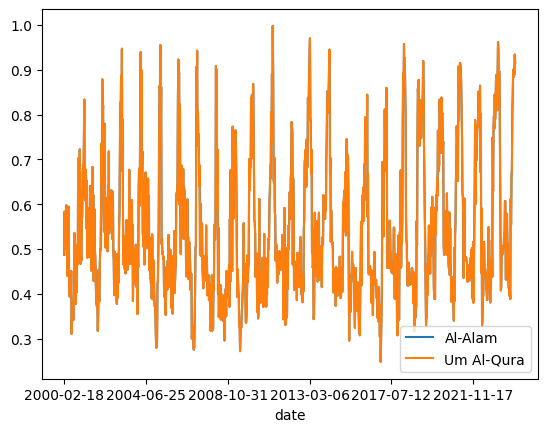

In [49]:
fig, ax = plt.subplots()
for adm3, df in tikrit_df.groupby('ADM3_EN'):
    tikrit_df.plot(y='max_evi_scaled', ax=ax, label=adm3)